# Regressão Linear com Dataset de Saúde
Este notebook realiza uma análise de regressão linear utilizando dados do dataset de saúde.
Ele explora a relação entre despesas totais de saúde e um indicador de cobertura.

In [3]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configurações de exibição
sns.set()
plt.rcParams['figure.figsize'] = (15, 9)

In [4]:
# Carregar o dataset
dataset_path = '../datasets/saude_despesas_limpo.csv'
saude = pd.read_csv(dataset_path)

# Exibir informações iniciais
print(saude.head())

    ano  id_municipio sigla_uf          nome  cob_ab  cob_acs  cob_esf  \
0  2010       1200013       AC    Acrelândia   100.0    100.0    100.0   
1  2010       1200054       AC  Assis Brasil   100.0    100.0    100.0   
2  2010       1200104       AC     Brasiléia   100.0    100.0    100.0   
3  2010       1200138       AC        Bujari   100.0    100.0    100.0   
4  2010       1200179       AC      Capixaba   100.0    100.0    100.0   

   cob_vac_bcg  cob_vac_rota  cob_vac_menin  ...  desp_recp_saude_pc_mun  \
0    42.962963     57.037037       1.111111  ...                  100.42   
1    55.357143     37.500000       0.000000  ...                  210.32   
2   100.000000     88.322718       0.000000  ...                  104.82   
3    90.566038    100.000000       0.000000  ...                  130.27   
4    49.746193     67.512690       0.000000  ...                   98.98   

   pct_desp_recp_saude_uf  desp_tot_saude_pc_uf  desp_recp_saude_pc_uf  \
0                     0.

## Regressão Linear
Vamos explorar a relação entre as despesas totais de saúde per capita e a cobertura da atenção básica.

In [5]:
# Selecionar variáveis para regressão
X = saude['desp_tot_saude_pc_mun'].values.reshape(-1, 1)  # Variável independente
y = saude['cob_ab'].values.reshape(-1, 1)  # Variável dependente

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

# Fazer previsões
y_pred = lin_regr.predict(X_test)

# Exibir coeficientes e métricas
print(f'Coeficiente: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercepto: {lin_regr.intercept_[0]:.2f}')
print(f'Erro Quadrático Médio: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

Coeficiente: 0.01
Intercepto: 86.23
Erro Quadrático Médio: 351.83
R²: 0.01


## Visualização da Regressão Linear
O gráfico abaixo mostra a linha de regressão e os pontos de dados.

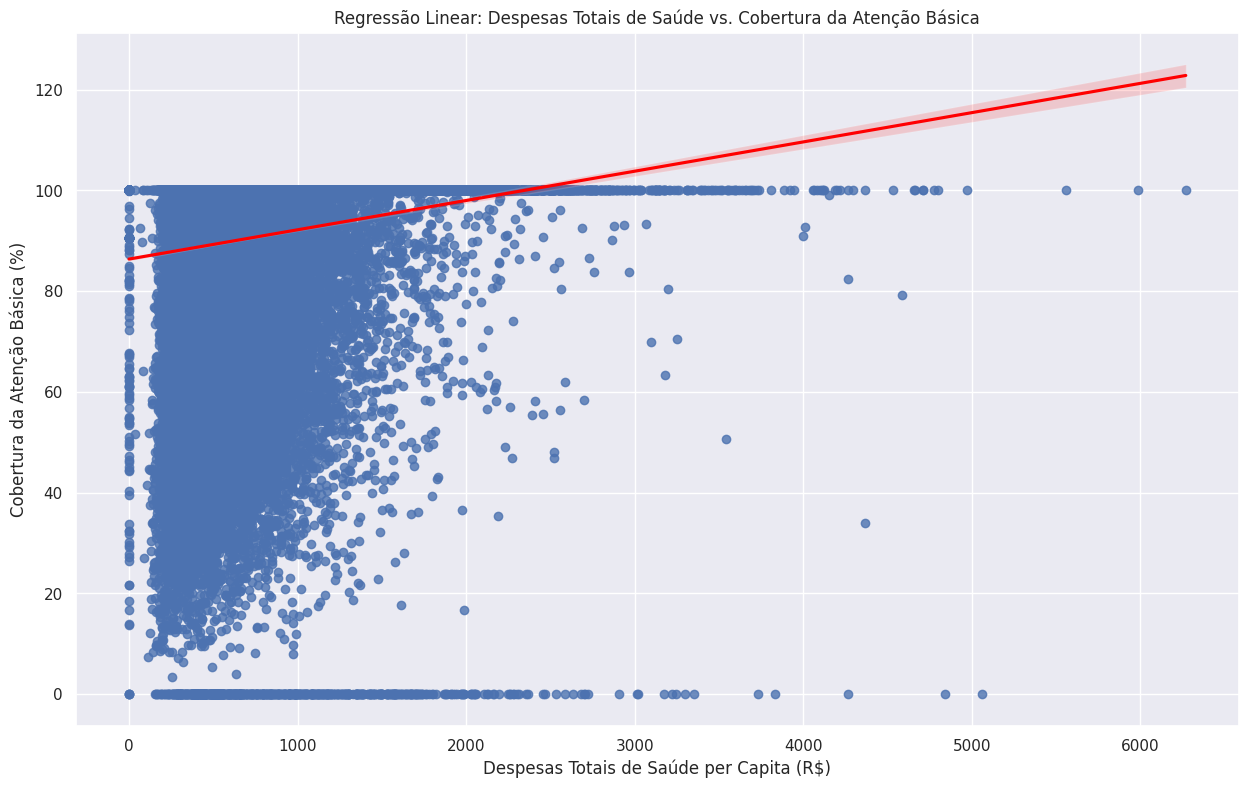

In [6]:
# Plotar a regressão linear
sns.regplot(x='desp_tot_saude_pc_mun', y='cob_ab', data=saude, line_kws={'color': 'red'})
plt.title('Regressão Linear: Despesas Totais de Saúde vs. Cobertura da Atenção Básica')
plt.xlabel('Despesas Totais de Saúde per Capita (R$)')
plt.ylabel('Cobertura da Atenção Básica (%)')
plt.show()